<a href="https://colab.research.google.com/github/marina-miyamoto/hw7/blob/master/%E5%AE%BF%E9%A1%8C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Load dataset / データセットを読み込む

In [34]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train_uint8, y_train), (x_test_uint8, y_test) = cifar10.load_data()


# Convert image from 0-255 to 0.0-1.0
x_train = x_train_uint8.astype('float32') / 255.0
x_test = x_test_uint8.astype('float32') / 255.0


# Convert labels into one-hot vectors
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)
for i in range(10):
  print(y_train[i], '->', y_train_one_hot[i])

# Label names
# http://corochann.com/cifar-10-cifar-100-dataset-introduction-1258.html
LABELS = [
    'airplane', 
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

[6] -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[9] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[4] -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2] -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[7] -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[8] -> [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[3] -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Preview image / 画像を見てみる

(32, 32, 3) [3] cat


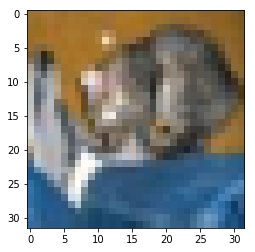

In [21]:
from matplotlib import pyplot as plt
index = 0
plt.imshow(x_test[index])
# Print shape and label
print(x_test[index].shape, y_test[index], LABELS[y_test[index][0]])

# Train a simple model / 簡単なモデルで訓練

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(32, 32, 3), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (4, 4), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(pool_size=(4, 4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train_one_hot,
          batch_size=128,
          epochs=20,
          validation_split=0.2)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_24 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        1568      
_________________________________________________________________
dropout_18 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               262272    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)             

## Try classification / 試しに分類してみる

0 cat
airplane   :     0.0158
automobile :     0.0058
bird       :     0.0275
cat        :     0.4827
deer       :     0.0318
dog        :     0.2863
frog       :     0.0371
horse      :     0.0138
ship       :     0.0896
truck      :     0.0096


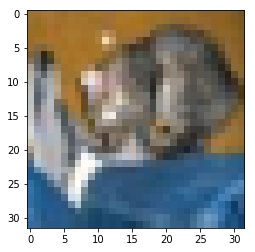

In [33]:
index = 0
plt.imshow(x_test_uint8[index])
print(index, LABELS[y_test[index][0]])
predicted = model.predict(x_test[index:index+1])
for i in range(len(LABELS)):
    print('{:11}: {:10.4f}'.format(LABELS[i], predicted[0][i]))

##  Evaluate the model with test set / テストセットでモデルを評価

In [0]:
# TODO
# See example: https://colab.sandbox.google.com/drive/1XzsOIP9RoJbDudsKagt9FSHMxSTE1GAo#scrollTo=EqYGKCBuAD2R